In [1]:
import yfinance as yf
import pandas_datareader
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
display("Practice exercise two")

'Practice exercise two'

In [2]:
display("Question 1: Download and plot US auto and housing sales since 1990")

'Question 1: Download and plot US auto and housing sales since 1990'

In [3]:
# Download financial data
data = yf.download('^GSPC', '1990-01-01', interval = "1d")
# take close only
data_sp_adj_close = pd.DataFrame(data["Close"])
data_sp_adj_close = data_sp_adj_close.rename(columns={"Close": "SP500"})
data_sp_adj_close.head()

[*********************100%***********************]  1 of 1 completed


SP500
Date                  
1990-01-02  359.690002
1990-01-03  358.760010
1990-01-04  355.670013
1990-01-05  352.200012
1990-01-08  353.790009

In [4]:
# Download Economic data from Fred
start = datetime.datetime(1990, 1, 1)
data = pandas_datareader.fred.FredReader(['TOTALSA','HSN1F'], start = start)
df = data.read()
print('TOTALSA: Total Vehicle Sales. Last observation: Nov 2020, Updated: Dec 23, 2020')
print('HSN1F: New One Family Houses Sold. Last observation: Dec 2020, Updated: 28 Jan, 2021')
# interpolate dates
df = df.reindex(pd.date_range(start=df.index.min(), end=df.index.max(),freq='1D')) 
df.tail()

TOTALSA: Total Vehicle Sales. Last observation: Nov 2020, Updated: Dec 23, 2020
HSN1F: New One Family Houses Sold. Last observation: Dec 2020, Updated: 28 Jan, 2021


TOTALSA  HSN1F
2020-11-27      NaN    NaN
2020-11-28      NaN    NaN
2020-11-29      NaN    NaN
2020-11-30      NaN    NaN
2020-12-01      NaN  842.0

In [5]:
# Merge the two dataset
df = df.merge(data_sp_adj_close, left_index=True, right_index=True)
df.head()

TOTALSA  HSN1F       SP500
1990-01-02      NaN    NaN  359.690002
1990-01-03      NaN    NaN  358.760010
1990-01-04      NaN    NaN  355.670013
1990-01-05      NaN    NaN  352.200012
1990-01-08      NaN    NaN  353.790009

In [6]:
# Take only end of month, but first carry forward information
df = df.fillna(method='ffill')
df["DATE"] = df.index.values
df = df[pd.to_datetime(df["DATE"]).dt.is_month_end]
df.tail(20)

TOTALSA  HSN1F        SP500       DATE
2018-08-31   17.314  598.0  2901.520020 2018-08-31
2018-10-31   18.142  552.0  2711.739990 2018-10-31
2018-11-30   17.844  614.0  2760.169922 2018-11-30
2018-12-31   17.844  614.0  2506.850098 2018-12-31
2019-01-31   17.844  614.0  2704.100098 2019-01-31
2019-02-28   17.098  665.0  2784.489990 2019-02-28
2019-04-30   17.156  664.0  2945.830078 2019-04-30
2019-05-31   17.862  600.0  2752.060059 2019-05-31
2019-07-31   17.527  661.0  2980.379883 2019-07-31
2019-09-30   17.600  706.0  2976.739990 2019-09-30
2019-10-31   17.273  706.0  3037.560059 2019-10-31
2019-12-31   17.437  696.0  3230.780029 2019-12-31
2020-01-31   17.437  696.0  3225.520020 2020-01-31
2020-03-31   17.437  696.0  2584.590088 2020-03-31
2020-04-30    9.059  570.0  2912.429932 2020-04-30
2020-06-30   13.354  840.0  3100.290039 2020-06-30
2020-07-31   14.998  979.0  3271.120117 2020-07-31
2020-08-31   14.998  979.0  3500.310059 2020-08-31
2020-09-30   16.728  965.0  3363.000000 2020-09-30
2020-11-30   16.745  949.0  3621.629883 2020-11-30

C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


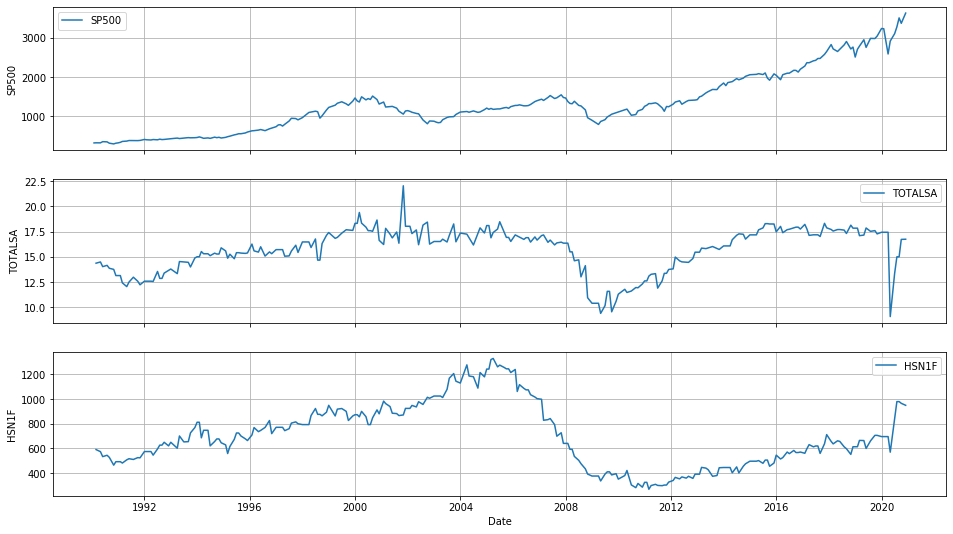

In [7]:
# Plot
fig, ax = plt.subplots(3, sharex=True, figsize=(16,9))
ax[0].plot(df["SP500"], label = "SP500")
ax[0].set_ylabel('SP500')
ax[0].legend()
ax[0].grid()
ax[1].plot(df["TOTALSA"], label = "TOTALSA")
ax[1].set_ylabel('TOTALSA')
ax[1].legend()
ax[1].grid()
ax[2].plot(df["HSN1F"], label = "HSN1F")
ax[2].set_xlabel('Date')
ax[2].set_ylabel('HSN1F')
ax[2].legend()
ax[2].grid()

In [8]:
display("Question 2: What transformations should we perform on the data? Why?")

'Question 2: What transformations should we perform on the data? Why?'

In [9]:
# Compute Log returns
df['SP500_log_chg'] = np.log(df["SP500"]) - np.log(df["SP500"].shift(1))
df['TOTALSA_log_chg'] = np.log(df["TOTALSA"]) - np.log(df["TOTALSA"].shift(1))
df['HSN1F_log_chg'] = np.log(df["HSN1F"]) - np.log(df["HSN1F"].shift(1))

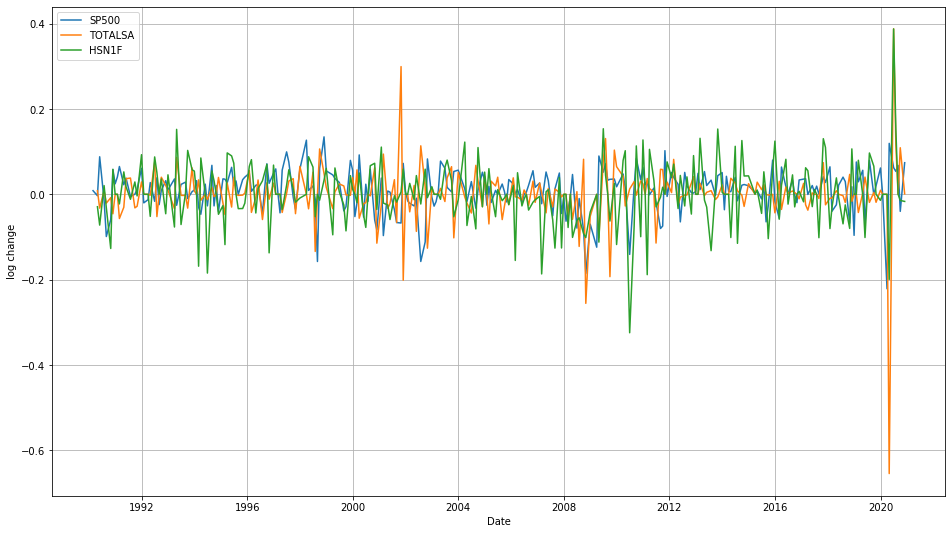

In [10]:
# Chart
# Plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(df["SP500_log_chg"], label = "SP500")
ax.plot(df["TOTALSA_log_chg"], label = "TOTALSA")
ax.plot(df["HSN1F_log_chg"], label = "HSN1F")
ax.set_xlabel('Date')
ax.set_ylabel('log change')
ax.legend()
ax.grid()

In [11]:
display("Question 3: What lags would we need to apply to test link with US stock market? Why?")

'Question 3: What lags would we need to apply to test link with US stock market? Why?'

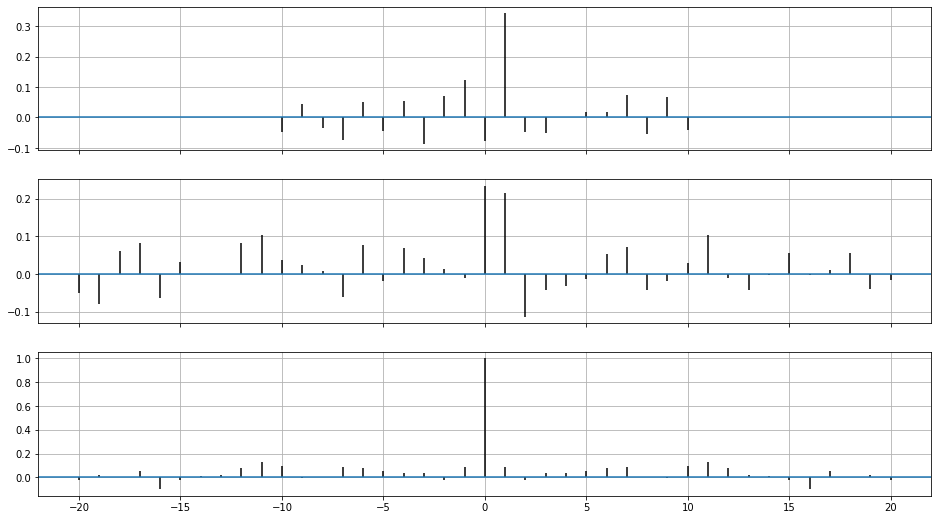

In [12]:
# Lead lag analysis without accounting for publication lag (1st input shifts on the x-axis)
# see description here: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.xcorr.html
fig, [ax1, ax2, ax3] = plt.subplots(3, 1, sharex=True, figsize=(16,9))
ax1.xcorr(df["TOTALSA_log_chg"][2:len(df)], df["SP500_log_chg"][2:len(df)], usevlines=True, maxlags=10)
ax1.grid(True)
ax2.xcorr(df["HSN1F_log_chg"][2:len(df)], df["SP500_log_chg"][2:len(df)], usevlines=True, maxlags=20)
ax2.grid(True)
ax3.acorr(df["SP500_log_chg"][2:len(df)], usevlines=True, normed=True, maxlags=20)
ax3.grid(True)
plt.show()

In [16]:
# Function to compute beta OLS
def Beta_OLS(y,X):
    return np.linalg.inv(np.matrix(X).T*np.matrix(X))*np.matrix(X).T*np.matrix(y).T

In [13]:
# Compute lagged values
df["SP500_log_chg_lag"] = df["SP500_log_chg"].shift(1)
df["HSN1F_log_chg_lag"] = df["HSN1F_log_chg"].shift(1)
df["TOTALSA_log_chg_lag"] = df["TOTALSA_log_chg"].shift(1)
df["TOTALSA_log_chg_lag_lag"] = df["TOTALSA_log_chg_lag"].shift(1)
# drop first missings
df = df[4:len(df)]
df.head()

TOTALSA  HSN1F       SP500       DATE  SP500_log_chg  \
1990-07-31   14.149  545.0  356.149994 1990-07-31      -0.014163   
1990-08-31   13.859  528.0  322.559998 1990-08-31      -0.099063   
1990-10-31   13.749  465.0  304.000000 1990-10-31      -0.059261   
1990-11-30   13.134  493.0  322.220001 1990-11-30       0.058207   
1990-12-31   13.134  493.0  330.220001 1990-12-31       0.024525   

            TOTALSA_log_chg  HSN1F_log_chg  SP500_log_chg_lag  \
1990-07-31         0.009016       0.020390           0.088001   
1990-08-31        -0.020709      -0.031690          -0.014163   
1990-10-31        -0.007969      -0.127059          -0.099063   
1990-11-30        -0.045762       0.058472          -0.059261   
1990-12-31         0.000000       0.000000           0.058207   

            HSN1F_log_chg_lag  TOTALSA_log_chg_lag  TOTALSA_log_chg_lag_lag  
1990-07-31          -0.072234            -0.032555                 0.008527  
1990-08-31           0.020390             0.009016                -0.032555  
1990-10-31          -0.031690            -0.020709                 0.009016  
1990-11-30          -0.127059            -0.007969                -0.020709  
1990-12-31           0.058472            -0.045762                -0.007969

In [14]:
# prepare vars
dates = df.index.values
y_t = df["SP500_log_chg"].values
y_t_1 = df["SP500_log_chg_lag"].values
x1_t_1 = df["HSN1F_log_chg_lag"].values
x2_t_1 = df["TOTALSA_log_chg_lag"].values
x2_t_2 = df["TOTALSA_log_chg_lag_lag"].values

In [17]:
# Run the recursive out of sample exercise
print("Including COVID data")
start_oos = np.where(dates==np.datetime64(datetime.datetime(2006,1,31)))[0][0]
# Set RHS + intercept
RHS = np.vstack((np.ones_like(y_t_1),y_t_1, x1_t_1, x2_t_1, x2_t_2)).T
RHS_ar = np.vstack((np.ones_like(y_t_1),y_t_1)).T
predictions = list()
predictions_ar = list()
test = list()
for t in range(start_oos, len(dates)):
    # compute beta AR 1 model
    beta_ar = Beta_OLS(y_t[:t],RHS_ar[:t,:])
    # compute beta full model
    beta = Beta_OLS(y_t[:t],RHS[:t,:])
    y_hat_ar = [RHS_ar[t,:]*beta_ar][0][0,0]
    y_hat = [RHS[t,:]*beta][0][0,0]
    true = y_t[t]
    predictions.append(y_hat)
    predictions_ar.append(y_hat_ar)
    test.append(true)
error_ar = mean_squared_error(test, predictions_ar)
error = mean_squared_error(test, predictions)
print('Test MSE: %.5f' % error)
print('Test MSE AR: %.5f' % error_ar)
relative_perf = (error_ar/error-1)*100
print('AR worst than model of %.2f' % relative_perf, '%')

Including COVID data
Test MSE: 0.00309
Test MSE AR: 0.00283
AR worst than model of -8.38 %


In [18]:
# without covid
print("Without COVID data")
start_covid = np.where(dates==np.datetime64(datetime.datetime(2020,1,31)))[0][0]
#dates[start_oos:]
error_ar_no_covid = mean_squared_error(test[:start_covid - start_oos], predictions_ar[:start_covid - start_oos])
error_no_covid = mean_squared_error(test[:start_covid - start_oos], predictions[:start_covid - start_oos])
print('Test MSE: %.5f' % error_no_covid)
print('Test MSE AR: %.5f' % error_ar_no_covid)
relative_perf_no_covid = (error_ar_no_covid/error_no_covid-1)*100
print('AR worst than model of %.2f' % relative_perf_no_covid, '%')

Without COVID data
Test MSE: 0.00215
Test MSE AR: 0.00230
AR worst than model of 6.96 %


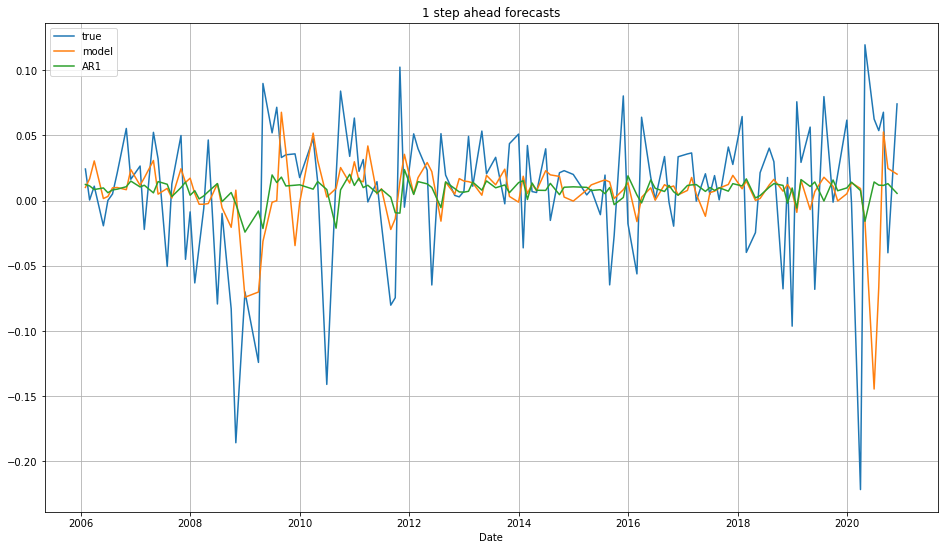

In [19]:
# collect 1 step ahead forecast in a df
df_pred = pd.DataFrame(list(zip(test, predictions, predictions_ar)), 
               columns =['true', 'model','AR1'])
df_pred['Time'] = dates[start_oos:]
df_pred = df_pred.set_index('Time')
# plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(df_pred["true"], label = "true")
ax.plot(df_pred["model"], label = "model")
ax.plot(df_pred["AR1"], label = "AR1")
ax.set_xlabel('Date')
plt.title('1 step ahead forecasts')
ax.legend()
ax.grid()